In [402]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, BayesianRidge, HuberRegressor, SGDRegressor, LogisticRegression, Perceptron
from sklearn.metrics import r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score

In [403]:
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [404]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


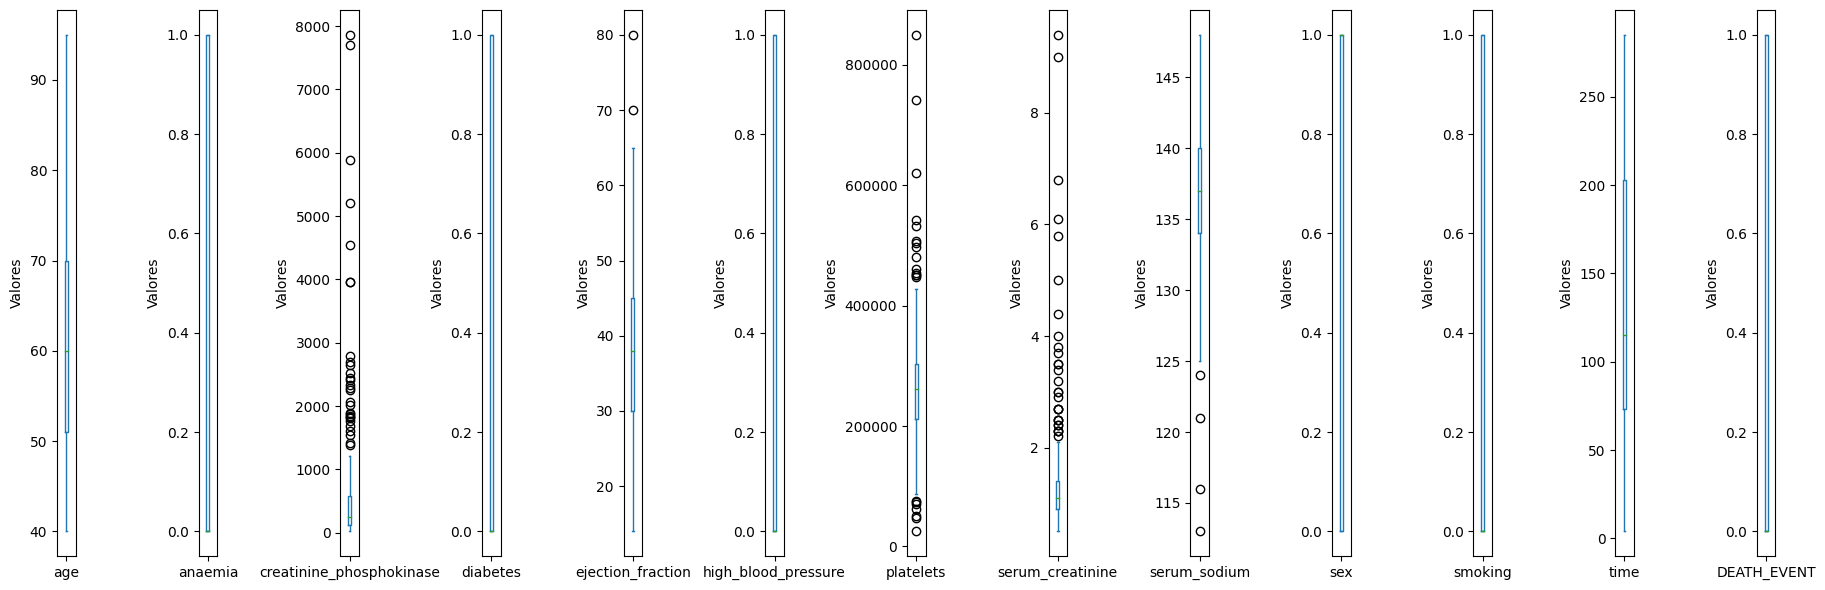

In [405]:
fig, axs = plt.subplots(nrows=1, ncols=len(data.columns), figsize=(18, 6))
for i, column in enumerate(data.columns):
      data[column].plot(kind='box', ax=axs[i], fontsize=10)
      axs[i].set_ylabel('Valores', fontsize=10)
plt.tight_layout()
plt.show()

In [406]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

array([' time', 'age', ' serum_sodium', ' serum_creatinine',
       ' ejection_fraction', ' sex'], dtype=object)

In [407]:
data = data.drop('anaemia', axis=1)
data = data.drop('diabetes', axis=1)
data = data.drop('high_blood_pressure', axis=1)
data = data.drop('platelets', axis=1)
#data = data.drop('serum_creatinine', axis=1)

In [408]:
y = data['DEATH_EVENT']
X = data.drop('DEATH_EVENT', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)

scalar = StandardScaler()
scalar.fit(X_train)
X_train = pd.DataFrame(scalar.transform(X_train), index=X_train.index, columns=X_train.columns)
X_test = pd.DataFrame(scalar.transform(X_test), index=X_test.index, columns=X_test.columns)

logistic_model = RandomForestClassifier()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [409]:
y_pred = logistic_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       0.96      0.93      0.95        46
           1       0.80      0.86      0.83        14

    accuracy                           0.92        60
   macro avg       0.88      0.90      0.89        60
weighted avg       0.92      0.92      0.92        60



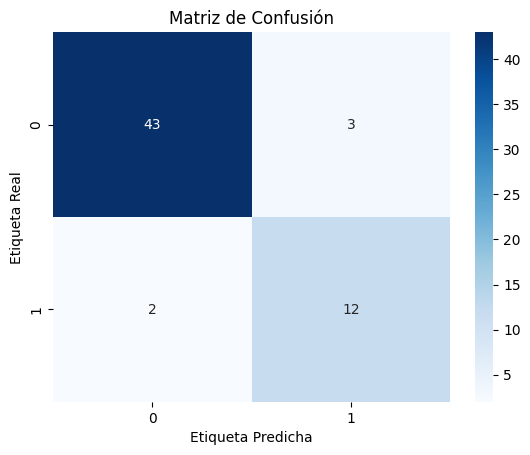

In [410]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.show()

In [411]:
y_probs = logistic_model.predict_proba(X_test)[:, 1]
y_test_binary = y_test.map({1: 1, 0: 0})
roc_auc = roc_auc_score(y_test_binary, y_probs)
tpr, fpr, thresholds = roc_curve(y_test_binary, y_probs)

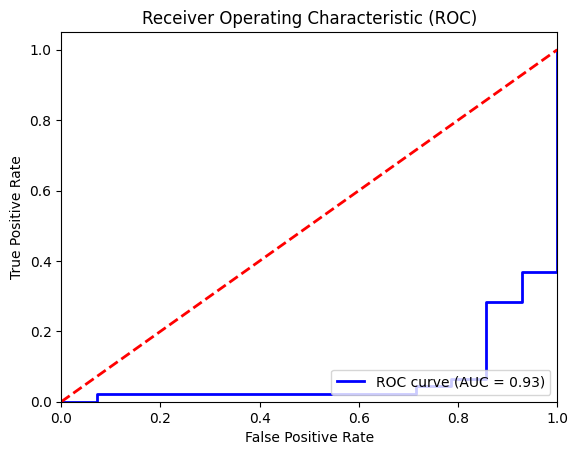

In [412]:
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()